In [1]:
import math as m
import numpy as np

# Q1

<span style='color:orange'>
Rotations. Implement transformation from rotation matrix to Euler angles and vice versa
</span>

## (a)

<span style='color:orange'>
Implement a function that receives as input Euler angles (roll angle φ, pitch angle
θ,and yaw angle ψ) and calculates the corresponding rotation matrix assuming roll-
pitch-yaw order from Body to Global: R = R Z (ψ) R Y (θ) R X (φ)
</span>

In [2]:
def eul2R_zyx(roll,pitch,yaw):
    return Rz(yaw) @ Ry(pitch) @ Rx(roll)

def Rx(theta):
    return np.matrix([[ 1, 0           , 0        ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
    return np.matrix([[m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
    return np.matrix([[m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

## (b)

<span style='color:orange'>
What is the rotation matrix from Body to Global for ψ = π/7, θ = π/5, and φ = π/4?
</span>

In [3]:
print(eul2R_zyx(roll=np.pi/4,pitch=np.pi/5,yaw=np.pi/7))

[[ 0.72889913  0.0676648   0.68126907]
 [ 0.35101932  0.81741497 -0.45674743]
 [-0.58778525  0.5720614   0.5720614 ]]


## (c)

<span style='color:orange'>
Implement a function that receives as input a rotation matrix and calculates the
corresponding Euler angles assuming roll-pitch-yaw order
</span>

We viewed the document "Computing Euler angles from a rotation matrix" by Gregory G. Slabaugh for an algoirthmic solution achieved by comparing abstract variables $R_{ij}$ and the multiplication solution we found before $R_{ij}(φ,θ,ψ)$

*The document is attached with this HW submission

In [4]:
def R2eul_zyx(R):
    '''
    here the convetion is 
         psi ~ roll
         theta ~ pitch
         phi ~ yaw
    '''
    if np.abs(R[2,0]) != 1:
        theta1 = -m.asin(R[2,0])
        theta2 = np.pi-theta1
        psi1 = m.atan2(R[2,1]/m.cos(theta1),R[2,2]/m.cos(theta1))
        psi2 = m.atan2(R[2,1]/m.cos(theta2),R[2,2]/m.cos(theta2))
        phi1 = m.atan2(R[1,0]/m.cos(theta1),R[0,0]/m.cos(theta1))
        phi2 = m.atan2(R[1,0]/m.cos(theta2),R[0,0]/m.cos(theta2))
        
        theta = np.array([theta1,theta2])
        psi = np.array([psi1, psi2])
        phi = np.array([phi1, phi2])
    else:
        phi = 0 #gimbal locking infinite solutions.. we choose one
        if R[2,0] == -1:
            theta = np.pi/2
            psi = phi+m.atan2(R[0,1],R[0,2])
        else:
            theta = -np.pi/2
            psi = -phi+m.atan2(-R[0,1],-R[0,2])
    
    return psi,theta,phi


## Our pal Gregory writes:
"Either case: "In both the θ = π/2 and θ = −π/2 cases, we have found that
ψ and φ are linked. This phenomenon is called Gimbal lock. Although
in this case, there are an infinite number of solutions to the problem, in
practice, one is often interested in finding one solution. For this task, it is
convenient to set φ = 0 and compute ψ as described above."

"More than one solution?
It is interesting to note that there is always more than one sequence of rotations
about the three principle axes that results in the same orientation of an object.
As we have shown in this report, in the non-degenerate case of cos θ 6 = 0, there
are two solutions. For the degenerate case of cos θ = 0, an infinite number of
solutions exist.
As an example, consider a book laying on a table face up in front of you.
Define the x-axis as to the right, the y-axis as away from you, and the z-axis
up. A rotation of π radians about the y-axis will turn the book so that the back
cover is now facing up. Another way to achieve the same orientation would be
to rotate the book π radians about the x-axis, and then π radians about the
z-axis. Thus, there is more than one way to achieve a desired rotation."

## (d)

<span style='color:orange'>
What are the Euler angles in degrees for the following rotation matrix (Body to Global,
assuming roll-pitch-yaw order):

$R_B^G=\begin{bmatrix} 0.813797681 & −0.440969611 & 0.378522306 \\ 
                        0.46984631 & 0.882564119 & 0.0180283112 
                        \\ −0.342020143 & 0.163175911 & 0.925416578 \end{bmatrix}$
</span>

In [5]:
R_B2G=np.array([[0.813797681, -0.440969611, 0.378522306],
                [0.46984631, 0.882564119, 0.0180283112],
                [-0.342020143, 0.163175911, 0.925416578]])

roll,pitch,yaw=R2eul_zyx(R_B2G)

#radians to degrees
gain=180/np.pi

print("roll = {} deg\n pitch = {} deg\n yaw = {} deg\n".format(roll*gain,pitch*gain,yaw*gain))
print("if two values per angle, than the first column is one solution and second is another")

roll = [   9.99999999 -170.00000001] deg
 pitch = [ 19.99999998 160.00000002] deg
 yaw = [  29.99999999 -150.00000001] deg

if two values per angle, than the first column is one solution and second is another


## Sanity check:

test $R_B^G$ against eul2R_zyx(R2eul_zyx($R_B^G$)

$\bar R$=eul2R_zyx(R2eul_zyx($R_B^G$)

In [6]:
Rbar0=eul2R_zyx(roll[0],pitch[0],yaw[0])
print("first solution numerical error norm {}".format(np.linalg.norm(R_B2G-Rbar0)))
Rbar1=eul2R_zyx(roll[1],pitch[1],yaw[1])
print("second solution numerical error norm {}".format(np.linalg.norm(R_B2G-Rbar1)))

first solution numerical error norm 1.034335846071033e-09
second solution numerical error norm 1.0343359123234674e-09


# Q2 

<span style='color:orange'>
3D rigid transformation. The coordinates of a 3D point in a global frame are

$$ l^G = (450, 400, 50) $$

This 3D point is observed by a camera whose pose is described by the following rotation
and translation with respect to the global frame:

$R_G^C=\begin{bmatrix} 0.5363 & −0.8440 & 0 \\ 
                       0.8440 & 0.5363 & 0
                        \\ 0 & 0 & 1 \end{bmatrix}$
                        
$$ t^G_{C->G} = (−451.2459, 257.0322, 400) $$

Calculate the 3D point coordinates in a camera frame ($l^C =?$). Write an explicit expression
for the appropriate 3D transformation (4 × 4 matrix) in terms of $R_G^C$ and $t^G_{C->G}$
</span>

$$ l^C = R_G^C l^G + t^C_{C->G} = R_G^C l^G + R_G^C t^G_{C->G} $$

$T_G^C=\begin{bmatrix} R_G^C  & R_G^C t^G_{C->G} \\ 
                        \\ 0 & 1 \end{bmatrix}$

In [7]:
R_G2C = np.array([[0.5363, -0.8440, 0],
                  [0.8440, 0.5363, 0],
                  [0, 0 ,1]])
t_G_C2G = np.array([-451.2459,257.0322,400])

In [8]:
def transform_from_rot_trans(R, t):
    #copied from programcreek
    R = R.reshape(3, 3)
    t = t.reshape(3, 1)
    return np.vstack((np.hstack([R, t]), [0, 0, 0, 1])) 

In [9]:
T_G2C = transform_from_rot_trans(R_G2C,R_G2C@t_G_C2G)
l_G = np.array([450, 400, 50, 1])  #homogenius
l_C = T_G2C @ l_G.T

print("l_c =  {}".format(l_C[:3]))

l_c =  [-555.20335297  351.31482926  450.        ]


# Q3 

<span style='color:orange'>
Pose composition. An autonomous ground vehicle (robot) is commanded to move forward
by 1 meter each time step. Due to imperfect control system, the robot instead moves
forward by 1.01 meter and also rotates by 1 degree.
Remark: In this exercise we consider a 2D scenario, where pose is defined in terms of x-y
coordinates and an orientation (heading) angle.
</span>

## (a)

<span style='color:orange'>
Write expressions for the corresponding commanded and actual transformations - note
these are relative to the robot frame. Guidance: calculate the rotation $R_k^{k+1}$ and translation $t_{kk+1→k}$ relating robot frames at
consecutive times k, k + 1 (commanded and actual). Use these to express commanded
and actual transformations $T_k^{k+1}$ .
</span>

We will work in homogenous coordinates

$ X =\begin{bmatrix} x \\ 
                        y \\
                        \theta \\
                         1 \end{bmatrix}$

$ R_k^{k+1}=R_z(-\theta) =\begin{bmatrix}
                        cos(-d\theta) & −sin(-d\theta) & 0 \\ 
                       sin(-d\theta) & cos(-d\theta) & 0 \\
                       0            &     0         & 1 \\
                        \end{bmatrix}$

We use the third dimension to evolve $\theta$ in time:

$$ t_{k+1->k}^{k+1} = R_k^{k+1} t_{k+1->k}^k  = R_k^{k+1}\begin{bmatrix}
                                                      -ds \\ 
                                                      0 \\
                                                   -d\theta \\
                                                   \end{bmatrix} $$

$$ T_k^{k+1} = \begin{bmatrix}
               R_k^{k+1} & t_{k+1->k}^{k+1} \\ 
               0 & 1  \\
               \end{bmatrix} $$ 


To evolve the state in time, we actually want $ T_{kk+1}^k = inv(T_k^{kk+1}) $. It can be counter intuitive, but the matrix that evolves the state in time to state $X_{k+1}$ is the inverse of the matrix that updates the coordinates system

                         

# (b)

<span style='color:orange'>
Assuming robot starts moving from the origin, calculate evolution of robot pose (in
terms of x-y position and orientation angle) for 10 steps using pose composition. Draw
the commanded and actual robot pose for 10 steps. What is the dead reckoning error
at the end? (write down x error , y error in meters, heading error in rad).
</span>

In [15]:
def computeRobotT(dtheta,ds):
    R_k2kp1 = Rz(-dtheta)
    t_k_k2kp1 = np.array([[-ds, 0, -dtheta]])
    t_kp1_k2kp1 = R_k2kp1 @ t_k_k2kp1.T
    return transform_from_rot_trans(R_k2kp1, t_kp1_k2kp1)

In [16]:
T_command=computeRobotT(dtheta = 0.0,ds = 1.0)
invT_command=np.linalg.inv(T_command)
T_actual=computeRobotT(dtheta = 1*np.pi/180,ds = 1.01)
invT_actual=np.linalg.inv(T_actual)

X0 = np.array([0.0, 0.0, 0.0, 1.0]).T
N = 10 #steps
X_command = np.zeros((4,N+1)) ; X_actual = np.zeros((4,N+1))
X_command[:,0] = X0 ; X_actual[:,0] = X0


for ii in range(N):
    X_command[:,ii+1] = invT_command @ X_command[:,ii]
    X_actual[:,ii+1] = invT_actual @ X_actual[:,ii]


print('absolute errors at step N = 10:')
print('x error = {} [m]'.format(abs(X_command[0,-1]-X_actual[0,-1])))
print('y error = {} [m]'.format(abs(X_command[1,-1]-X_actual[1,-1])))
print('theta error = {} [rad]'.format(abs(X_command[2,-1]-X_actual[2,-1])))


absolute errors at step N = 10:
x error = 0.05621777424421026 [m]
y error = 0.7914415030330848 [m]
theta error = 0.17453292519943295 [rad]


Text(0, 0.5, 'theta [rad]')

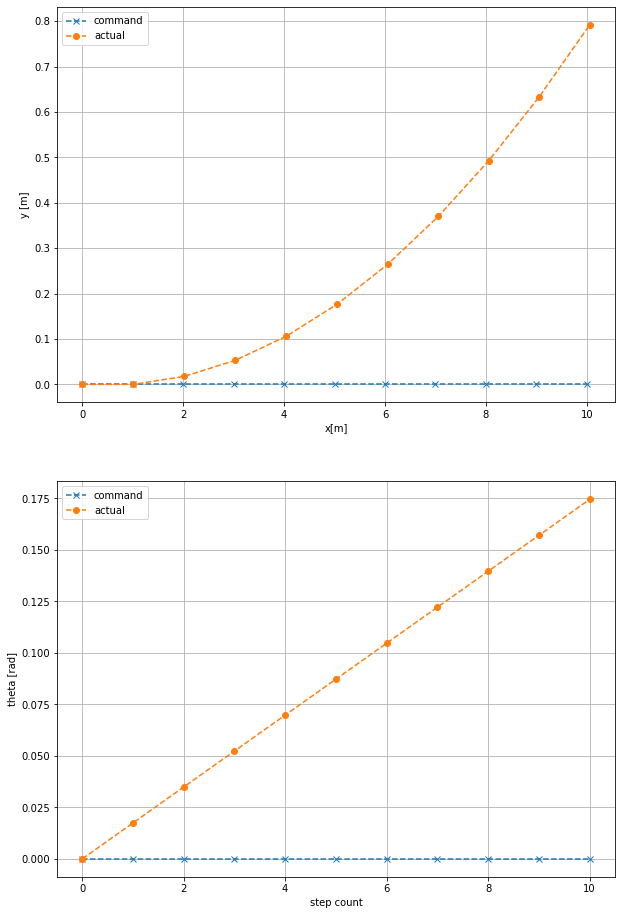

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(10,16))

ax=axs[0]
line_command, = ax.plot(X_command[0,:],X_command[1,:],"--x")
line_command.set_label('command')
line_actual, = ax.plot(X_actual[0,:],X_actual[1,:],"--o")
line_actual.set_label('actual')
ax.legend(); ax.grid(True)
ax.set_xlabel("x[m]")
ax.set_ylabel("y [m]")

ax=axs[1]
line_command, = ax.plot(range(N+1),X_command[2,:],"--x")
line_command.set_label('command')
line_actual, = ax.plot(range(N+1),X_actual[2,:],"--o")
line_actual.set_label('actual')
ax.legend(); ax.grid(True)
ax.set_xlabel("step count")
ax.set_ylabel("theta [rad]")